<a href="https://colab.research.google.com/github/masoudshahrian/Deep-learning-code/blob/main/CnnModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **مدل‌های از پیش آموزش دیده شده به عنوان دسته‌بند**
# یک مدل از پیش آموزش دیده شده را می‌توان به طور مستقیم برای دسته‌بندی تصاویر یکی از هزار کلاس (دسته) شناخته شده در وظیفه دسته‌بندی تصویر ILSVRC، استفاده کرد. از مدل VGG16 برای دسته‌بندی تصاویر جدید استفاده می‌شود. ابتدا، عکس باید بارگذاری، و سپس به ابعاد 224×224 و مقادیر پیکسلی که مورد انتظار مدل است، تغییر داده شود. مدل روی نمونه‌های یک آرایه عمل می‌کند، بنابراین ابعاد یک تصویر بارگذاری شده باید ۱ واحد برای تصویری با 224×224 پیکسل و سه کانال، توسعه پیدا کنند.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


1/1 [==============================] - 3s 3s/step
predicted object is:
Doberman
with accuracy
58.617860078811646


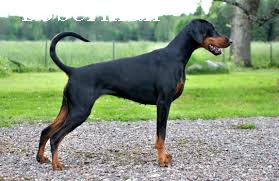

-1

In [ ]:
from keras.applications import InceptionV3
from keras.applications import imagenet_utils
from keras.preprocessing.image import img_to_array, load_img
from keras.applications.inception_v3 import preprocess_input
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

#loading the image to predict
img_path = '/content/gdrive/My Drive/Python_MLpackages/dog5.jpg'
img = load_img(img_path)

#resize the image to 299x299 square shape
img = img.resize((299,299))
#convert the image to array
img_array = img_to_array(img)

#convert the image into a 4 dimensional Tensor
#convert from (height, width, channels), (batchsize, height, width, channels)
img_array = np.expand_dims(img_array, axis=0)

#preprocess the input image array
img_array = preprocess_input(img_array)

#Load the model from internet / computer
#approximately 96 MB
pretrained_model = InceptionV3(weights="imagenet")

#predict using predict() method
prediction = pretrained_model.predict(img_array)
#decode the prediction
actual_prediction = imagenet_utils.decode_predictions(prediction)

print("predicted object is:")
print(actual_prediction[0][0][1])
print("with accuracy")
print(actual_prediction[0][0][2]*100)

#display image and the prediction text over it
disp_img = cv2.imread(img_path)
#display prediction text over the image
cv2.putText(disp_img, actual_prediction[0][0][1], (20,20), cv2.FONT_HERSHEY_TRIPLEX , 0.8, (255,255,255))

#show the image
cv2_imshow(disp_img)
cv2.waitKey(0)

In [ ]:
# example of using a pre-trained model as a classifier
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
# load an image from file
image = load_img('/content/gdrive/My Drive/Python_MLpackages/dog.jpg', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# load the model
model = VGG16()
# predict the probability across all output classes
yhat = model.predict(image)
# convert the probabilities to class labels
label = decode_predictions(yhat)
#print(label)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

35363/35363 [==============================] - 0s 0us/step
Doberman (35.70%)


In [ ]:
yhat

In [ ]:
label = decode_predictions(yhat)

In [ ]:
label

[[('n02107142', 'Doberman', 0.3569595),
  ('n02105412', 'kelpie', 0.20830338),
  ('n02106550', 'Rottweiler', 0.17037845),
  ('n02089078', 'black-and-tan_coonhound', 0.12976292),
  ('n02107312', 'miniature_pinscher', 0.034512363)]]

In [ ]:
yhat.argmax()

708

In [ ]:
image

In [ ]:
# example of using the vgg16 model as a feature extraction model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from keras.models import Model
from pickle import dump
# load an image from file
image = load_img('/content/gdrive/My Drive/Python_MLpackages/dog.jpg', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# load model
model = VGG16()
# remove the output layer
model.layers.pop()
model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
# get extracted features
features = model.predict(image)
print(features.shape)
# save to file
dump(features, open('dog.pkl', 'wb'))

1/1 [==============================] - 1s 1s/step
(1, 1000)


In [ ]:
features.argmax()

236

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten

# load model without classifier layers
model = VGG16(include_top=False, input_shape=(300, 300, 3))

# Flatten the output of the VGG16 model
flat1 = Flatten()(model.output)

# Add new classifier layers
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(10, activation='softmax')(class1)

# Define new model
model = Model(inputs=model.input, outputs=output)

# Summarize the model
model.summary()


In [ ]:
from keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from keras.preprocessing.image import load_img, img_to_array

# Load an image from file
image = load_img('/content/gdrive/My Drive/Python_MLpackages/dog.jpg', target_size=(299, 299))  # InceptionV3 requires input size (299, 299)
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)

# Load the InceptionV3 model
model = InceptionV3()

# Predict the probability across all output classes
yhat = model.predict(image)

# Convert the probabilities to class labels
label = decode_predictions(yhat)
print(label)
# Retrieve the most likely result, e.g., highest probability
label = label[0][0]

# Print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))


1/1 [==============================] - 3s 3s/step
[[('n02106550', 'Rottweiler', 0.47148964), ('n02105412', 'kelpie', 0.03969697), ('n02089078', 'black-and-tan_coonhound', 0.035202987), ('n02101006', 'Gordon_setter', 0.024494652), ('n02093256', 'Staffordshire_bullterrier', 0.01798877)]]
Rottweiler (47.15%)


In [ ]:
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from keras.preprocessing.image import load_img, img_to_array

# Load an image from file
image = load_img('/content/gdrive/My Drive/Python_MLpackages/dog6.jpg', target_size=(224, 224))  # ResNet50 requires input size (224, 224)
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)

# Load the ResNet50 model
model = ResNet50()

# Predict the probability across all output classes
yhat = model.predict(image)

# Convert the probabilities to class labels
label = decode_predictions(yhat)

# Retrieve the most likely result, e.g., highest probability
label = label[0][0]

# Print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))


1/1 [==============================] - 2s 2s/step
Brabancon_griffon (76.89%)


In [ ]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import torch

# Load and preprocess the image
img_path = '/content/gdrive/My Drive/Python_MLpackages/dog4.jpg'
image = Image.open(img_path).convert('RGB')

# Load the CLIP processor and model
processor = CLIPProcessor.from_pretrained('openai/clip-vit-base-patch16')
model = CLIPModel.from_pretrained('openai/clip-vit-base-patch16')

# Encode the image and get features
inputs = processor(text=["a photo of a dog"], images=image, return_tensors="pt", padding=True)
outputs = model(**inputs)

# Extract embeddings
image_embeds = outputs.image_embeds
text_embeds = outputs.text_embeds

# Calculate similarity score between image and text embeddings
similarity_score = torch.nn.functional.cosine_similarity(image_embeds, text_embeds).item()

# Print the result
print(f'Description: "a photo of a dog"')
print(f'Similarity Score: {similarity_score}')


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.10k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/599M [00:00<?, ?B/s]

Description: "a photo of a dog"
Similarity Score: 0.2885867655277252


In [ ]:
!pip install torchvision

ERROR: Could not find a version that satisfies the requirement torchvision.models (from versions: none)
ERROR: No matching distribution found for torchvision.models


In [ ]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import transforms
from PIL import Image

# Load the pre-trained Faster R-CNN model for object detection
model_detection = fasterrcnn_resnet50_fpn(pretrained=True)
model_detection.eval()

# Load the image
image_path = '/content/gdrive/My Drive/Python_MLpackages/dog4.jpg'
image = Image.open(image_path)

# Preprocess the image for object detection
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_image = transform(image).unsqueeze(0)

# Perform object detection
with torch.no_grad():
    detections = model_detection(input_image)

# Extract bounding boxes from the detections (just an example, modify as needed)
boxes = detections[0]['boxes']

# Use the bounding boxes to crop regions of interest (ROIs) from the original image
# Use the bounding boxes to crop regions of interest (ROIs) from the original image
rois = []
for box in boxes:
    # Convert the tensor to a list of integers
    box = [int(x) for x in box.tolist()]
    roi = image.crop((box[0], box[1], box[2], box[3]))
    rois.append(roi)


# Here you can implement your own image captioning model or use an existing one
# For simplicity, let's assume you have a function 'generate_caption' that takes an image and returns a caption
def generate_caption(roi):
    # Replace this with your actual image captioning model or logic
    return "A dog in the image."

# Generate captions for each ROI
captions = [generate_caption(roi) for roi in rois]

# Print the captions
for i, caption in enumerate(captions):
    print(f'Caption for ROI {i + 1}: {caption}')


Caption for ROI 1: A dog in the image.
Caption for ROI 2: A dog in the image.
Caption for ROI 3: A dog in the image.
Caption for ROI 4: A dog in the image.
Caption for ROI 5: A dog in the image.
